# Lab 5 Exercise

## Convolutional Neural Networks (CNN)

We are already familiar with traditional neural networks called feed-forward netowks. However, feed-forward networks are not the best idea to use for image processing. One of the main problems is that spatial information is lost when the image is flattened into an feed-forward network. For example, if a picture of a car appears in the top left of the image in one picture and the bottom right of another picture, the feed-forward network will try to correct itself and assume that a car will always appear in this section of the image.

A Convolutional neural network (CNN) is a neural network that has one or more convolutional layers. 
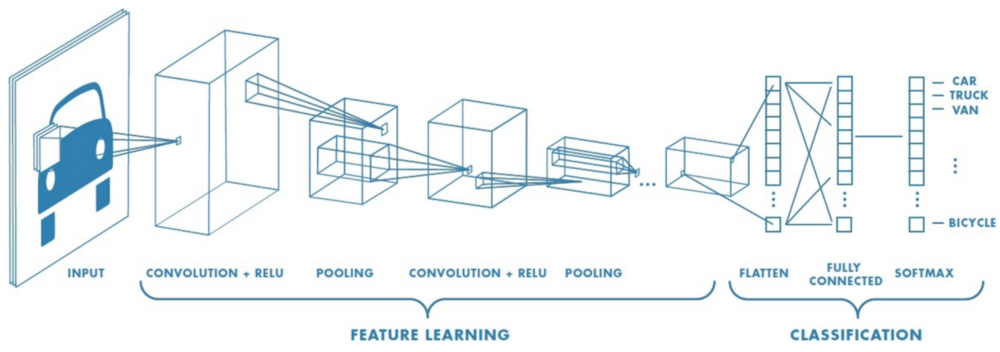
<font size=1> image source:  https://miro.medium.com/max/1000/1*irQx0wao-u9jOfLIM9C-rA.png</font>



### Convolution

A convolution is sliding a filter over the input. A filter could be related to anything, for pictures of humans, one filter could be associated with seeing noses, and our nose filter would give us an indication of how strongly a nose seems to appear in our image, and how many times and in what locations they occur.

1. Overlaying the filter on top of the image at some location.
2. Performing element-wise multiplication between the values in the filter and their corresponding values in the image.
3. Summing up all the element-wise products. This sum is the output value for the destination pixel in the output image.
4. Repeating for all locations.

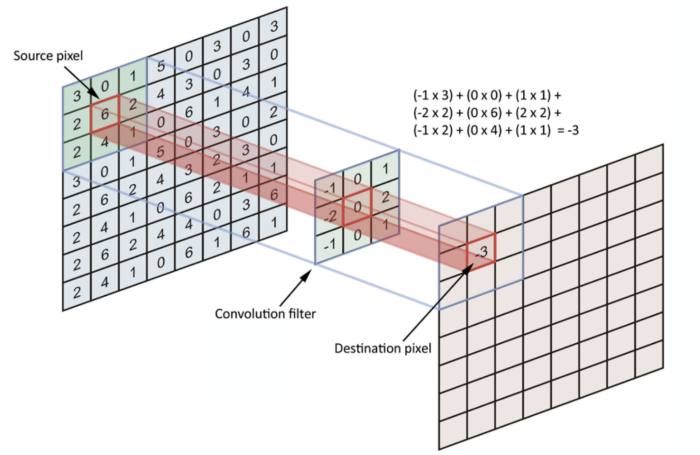
<font size=1> image source: https://miro.medium.com/max/700/1*p-_47puSuVNmRJnOXYPQCg.png </font>

Some example of kernel filters for CNN:
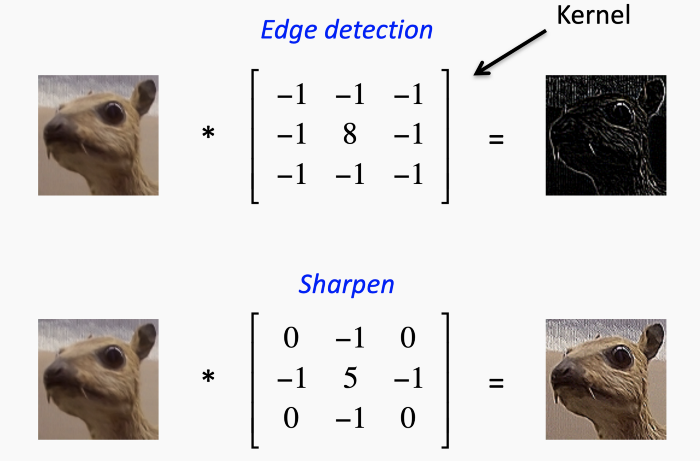

<font size= 1>image source: https://miro.medium.com/max/700/1*RmglbLeNDWSHbdrtrysfbw.png</font>

You can play with the Image Kernels at https://setosa.io/ev/image-kernels/.
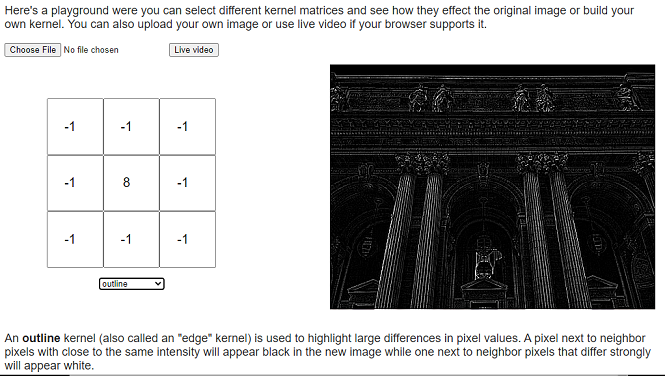


### Padding

Usually we prefer to have the output image be the same size as the input image. To do this, we add zeros around the image so we can overlay the filter in more places.

Example:
A 4x4 input convolved with a 3x3 filter to produce a 4x4 output using 1 pixel of padding


<font size= 1>image source: https://victorzhou.com/media/cnn-post/padding.svg </font>


### Stride
The amount by which the filter shifts is the stride. It controls how the filter convolves around the input volume. By default, the filter convolves around the input volume by shifting one unit at a time. However, sometimes, either for computational efficiency or because we wish to downsample, we move our window more than one element at a time, skipping the intermediate locations.

Example: 
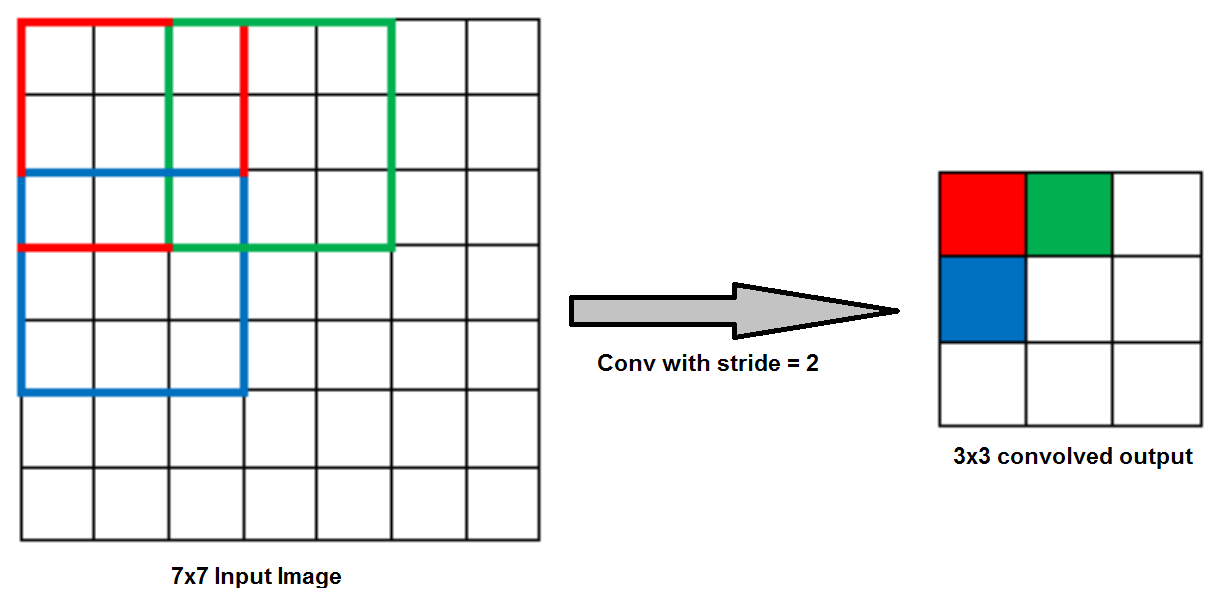

<font size=1> image source: https://learning.oreilly.com/library/view/hands-on-transfer-learning/9781788831307/assets/a65a1d73-ae70-45c8-b643-0b27aa9fe394.png </font>

#### 2D Convolution in Pytorch
`nn.Conv2d()` applies 2D convolution over the input. nn.Conv2d() expects the input to be of the shape `[batch_size, input_channels, input_height, input_width]`.

The parameters are:
- in_channels (int) — Number of channels in the 2d input.
- out_channels (nt) — Number of channels produced by the convolution.
- kernel_size (int or tuple) — Size of the convolving kernel.
- stride (int or tuple, optional) — Stride of the convolution. Default: 1
- padding (int or tuple, optional) — Zero-padding added to both sides of the input. Default: 0
- padding_mode (string, optional) — 'zeros', 'reflect', 'replicate' or 'circular'. Default: 'zeros'
- dilation (int or tuple, optional) — Spacing between kernel elements. Default: 1
- groups (int, optional) — Number of blocked connections from input channels to output channels. Default: 1
- bias (bool, optional) — If True, adds a learnable bias to the output. Default: True

See https://pytorch.org/docs/stable/nn.html#convolution-layers for more information.

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


Examples:

In [1]:
import torch
import torch.nn as nn

In [2]:
# input tensor of size [1, 3, 3, 10]
# batch_size = 1, input channels = 3, input_height = 3, input_width = 10
input_2d_img = torch.tensor([[[[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], 
                             [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]], 
                             [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
                              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]]], dtype = torch.float)

In [3]:
print(input_2d_img.shape)
print(input_2d_img)

torch.Size([1, 3, 3, 10])
tensor([[[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

         [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]],

         [[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
          [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]]]])


In [4]:
cnn2d_v1 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=1)
print(cnn2d_v1(input_2d_img).shape)
print(cnn2d_v1(input_2d_img))

torch.Size([1, 1, 1, 8])
tensor([[[[1.0083, 1.6081, 2.2079, 2.8077, 3.4074, 4.0072, 4.6070, 5.2068]]]],
       grad_fn=<ThnnConv2DBackward0>)


In [5]:
import torch.nn as nn
cnn2d_v2 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2)
print(cnn2d_v2(input_2d_img).shape)
print(cnn2d_v2(input_2d_img))

torch.Size([1, 1, 1, 4])
tensor([[[[0.2000, 0.3240, 0.4481, 0.5722]]]], grad_fn=<ThnnConv2DBackward0>)


In [6]:
import torch.nn as nn
cnn2d_v3 = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=2, stride=1)
print(cnn2d_v3(input_2d_img).shape)
print(cnn2d_v3(input_2d_img))

torch.Size([1, 1, 2, 9])
tensor([[[[0.7626, 1.2390, 1.7153, 2.1917, 2.6681, 3.1444, 3.6208, 4.0972,
           4.5735],
          [0.7626, 1.2390, 1.7153, 2.1917, 2.6681, 3.1444, 3.6208, 4.0972,
           4.5735]]]], grad_fn=<ThnnConv2DBackward0>)


In [7]:
import torch.nn as nn
cnn2d_v4 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=3, stride=1)
print(cnn2d_v4(input_2d_img).shape)
print(cnn2d_v4(input_2d_img))

torch.Size([1, 5, 1, 8])
tensor([[[[-0.9734, -1.2852, -1.5971, -1.9089, -2.2207, -2.5326, -2.8444,
           -3.1562]],

         [[-0.3677, -0.5861, -0.8046, -1.0231, -1.2416, -1.4601, -1.6785,
           -1.8970]],

         [[-0.1113, -0.6391, -1.1670, -1.6948, -2.2227, -2.7505, -3.2784,
           -3.8062]],

         [[-0.0286,  0.4273,  0.8833,  1.3392,  1.7952,  2.2511,  2.7071,
            3.1630]],

         [[-0.2631, -0.7620, -1.2608, -1.7596, -2.2584, -2.7573, -3.2561,
           -3.7549]]]], grad_fn=<ThnnConv2DBackward0>)


### Pooling
Neighboring pixels in images tend to have similar values, so convoluional layers will typically also produce similar values for neighboring pixels in outputs. As a result, much of the information contained in a convoluional layer’s output is redundant. 

Pooling layers solve this problem. All they do is reduce the size of the input it is given by pooling values together in the input. The pooling is usually done by a simple operation like max, min, or average. 

Here is an example of a Max Pooling layer with 2x2 filters and stride 2:
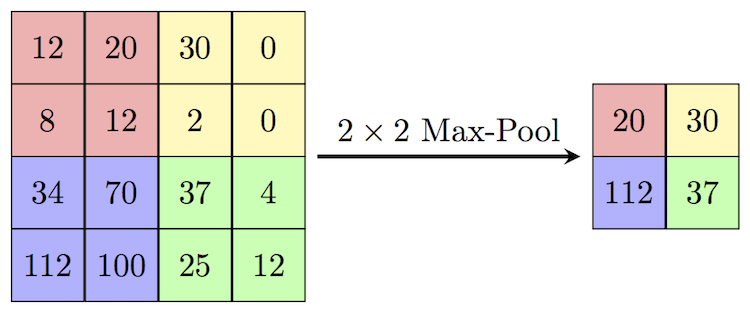
<font size=1>image source:  https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png</font>

#### 2D Max Pooling
`nn.MaxPool2d()` applies a 2D max pooling over an input signal composed of several input planes. It expects input of shape `[batch_size, input_channels, input_height, input_width]`.

The parameters are:
- kernel_size – the size of the window to take a max over

- stride – the stride of the window. Default value is kernel_size

- padding – implicit zero padding to be added on both sides

- dilation – a parameter that controls the stride of elements in the window

- return_indices – if True, will return the max indices along with the outputs. Useful for torch.nn.MaxUnpool2d later

- ceil_mode – when True, will use ceil instead of floor to compute the output shape

See https://pytorch.org/docs/master/generated/torch.nn.MaxPool2d.html for more information.

### Exercise: Building Convolutional Neural Networks using Pytorch 

### Natural Images Dataset

This dataset contains 6,899 images from 8 distinct classes compiled from various sources. The classes include airplane, car, cat, dog, flower, fruit, motorbike and person.

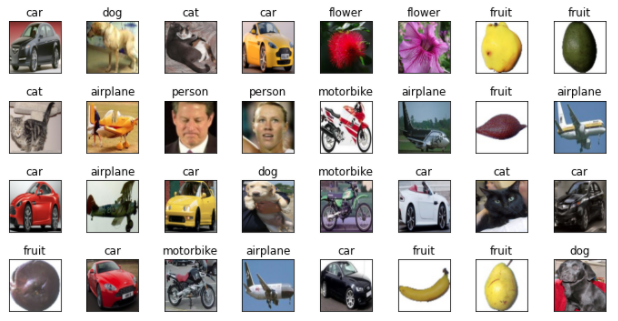

Data source: https://www.kaggle.com/prasunroy/natural-images

#### Your Task: Complete the following steps to finish the networks. 
Note: Step 1 to 3 have been done for you already.

1. Import the reuqired libraries

In [12]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [50]:
# import libraries
import torch
import torch.nn as nn
import torch.optim as optim  
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

2. Load the dataset and prepare the dataloaders

In [51]:
train_dir = './data/natural_images/training_set'
test_dir = './data/natural_images/test_set'

transforms = transforms.Compose([ 
                                 transforms.Resize((128, 128)), 
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# load and transform the data
trainset = datasets.ImageFolder(train_dir, transform=transforms)
testset = datasets.ImageFolder(test_dir,transform=transforms)

num_train = len(trainset)
indices = list(range(num_train))
split = int(np.floor(0.2 * num_train)) # split around 20% from the train set to validation set
np.random.seed(0)
np.random.shuffle(indices)

train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# data loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,sampler=train_sampler)
validloader = torch.utils.data.DataLoader(trainset, batch_size=64,sampler=valid_sampler)
testloader = torch.utils.data.DataLoader(testset, batch_size=64)


In [10]:
len(trainset)

4140

In [11]:
len(testset)

2759

In [12]:
trainset.classes # label of the classes

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']

In [13]:
print(testset[0][0]) # first image in testset
print(testset[0][1]) # class of the first image in testset

tensor([[[-0.3020, -0.2863, -0.2392,  ..., -0.3412, -0.3647, -0.3569],
         [-0.2392, -0.3490, -0.3255,  ..., -0.3882, -0.3961, -0.3961],
         [-0.1686, -0.3882, -0.4667,  ..., -0.4353, -0.4118, -0.4118],
         ...,
         [ 0.1529,  0.1451,  0.1373,  ...,  0.0431,  0.0510,  0.0745],
         [ 0.1529,  0.1451,  0.1137,  ...,  0.0353,  0.0510,  0.0824],
         [ 0.0275,  0.0510,  0.0510,  ...,  0.0039,  0.0196,  0.0431]],

        [[-0.1373, -0.0902, -0.0275,  ..., -0.1373, -0.1608, -0.1451],
         [-0.0745, -0.1529, -0.1137,  ..., -0.1843, -0.1843, -0.1843],
         [ 0.0039, -0.1843, -0.2471,  ..., -0.2314, -0.2000, -0.2000],
         ...,
         [ 0.1294,  0.1216,  0.1137,  ...,  0.0588,  0.0745,  0.0824],
         [ 0.1137,  0.1059,  0.0902,  ...,  0.0431,  0.0667,  0.0902],
         [-0.0196,  0.0118,  0.0353,  ...,  0.0118,  0.0275,  0.0510]],

        [[-0.1137, -0.0588,  0.0039,  ..., -0.1608, -0.1843, -0.1843],
         [-0.0510, -0.1216, -0.0745,  ..., -0

3. Show some images and labels in the training batch

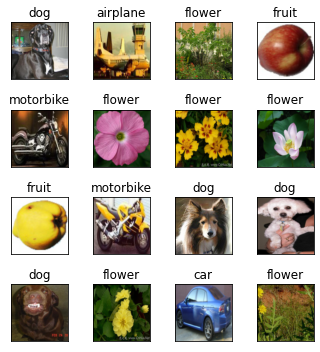

In [52]:
# Show some images and labels in the training batch
dataiter = iter(trainloader)
images, labels = dataiter.next()  

fig = plt.figure(figsize=(5, 5))
#show the first 16 images in the batch
for i in np.arange(16):
    # add_subplot(nrows, ncols, index, **kwargs)
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    img = images[i] / 2 + 0.5  # unnormalize    
    # in tensor, image is (channel, width, height), 
    # transpose it to (width, height, channel) in numpy to show it
    ax.imshow(np.transpose(img, (1, 2, 0)))
    ax.set_title(testset.classes[labels[i].item()])
    fig.tight_layout()

4. Define a CNN with the following layers

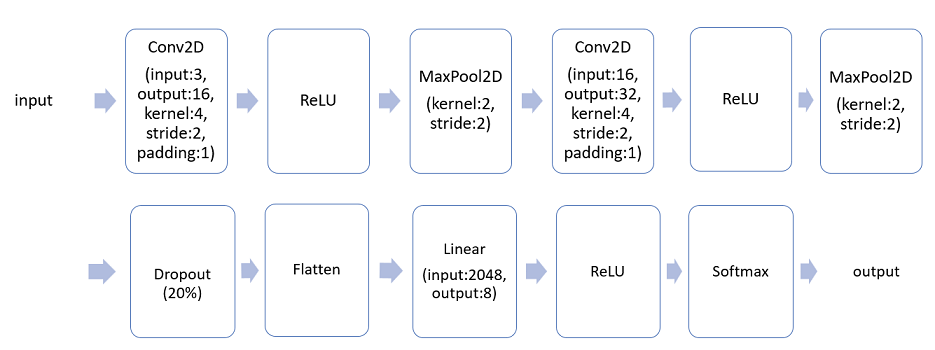

In [53]:
from torch import nn

model = nn.Sequential(
  nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=16, kernel_size=4, stride=2, padding=1),     
    nn.ReLU(),            
    nn.MaxPool2d((2,2)),  
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=4, stride=2, padding=1),       
    nn.ReLU(),            
    nn.MaxPool2d((2,2)),      
    nn.Dropout(0.2)
  ),
  nn.Flatten(),          
  nn.Sequential(
    nn.Linear(2048, 8),
    nn.ReLU(),           
    nn.LogSoftmax()
  ),
)
print(model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.2, inplace=False)
  )
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Sequential(
    (0): Linear(in_features=2048, out_features=8, bias=True)
    (1): ReLU()
    (2): LogSoftmax(dim=None)
  )
)


5. Define the loss function and optimizer

Use `CrossEntropyLoss()` function and `SGD` optimizer with learning rate `0.1`


In [54]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

6. Train the network with 20 epochs

In [55]:
# train the network

epochs = 20  # modify the number of epochs to further train the network
train_losses = np.zeros(epochs)
valid_losses = np.zeros(epochs)


for epoch in range(epochs):  # loop over the dataset multiple times
    model.train()
    train_loss = []     
    for data in trainloader:
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)
        
        # loss calculation
        loss = loss_function(outputs, labels)
        
        # backward propagation
        loss.backward()
        
        # weight optimization
        optimizer.step()

        train_loss.append(loss.item())
    
    model.eval()
    with torch.no_grad():
        valid_loss = []
        for data in validloader:
            # get the validset; data is a list of [inputs, labels]
            inputs, labels = data
       
            # forward propagation
            outputs = model(inputs)
        
            # loss calculation
            loss = loss_function(outputs, labels)
        
            valid_loss.append(loss.item())
            
    # print statistics
    train_loss = np.mean(train_loss)
    valid_loss = np.mean(valid_loss)
    
    print( 'Epoch [%d] train loss: %.3f  valid loss: %.3f' %
         (epoch + 1, train_loss, valid_loss ))
    
    # save losses
    train_losses[epoch] = train_loss
    valid_losses[epoch] = valid_loss
print('Finished Training')


Epoch [1] train loss: 1.506  valid loss: 1.024
Epoch [2] train loss: 1.025  valid loss: 0.791
Epoch [3] train loss: 0.619  valid loss: 0.511
Epoch [4] train loss: 0.480  valid loss: 0.525
Epoch [5] train loss: 0.368  valid loss: 0.421
Epoch [6] train loss: 0.327  valid loss: 0.415
Epoch [7] train loss: 0.301  valid loss: 0.389
Epoch [8] train loss: 0.247  valid loss: 0.505
Epoch [9] train loss: 0.213  valid loss: 0.452
Epoch [10] train loss: 0.172  valid loss: 0.375
Epoch [11] train loss: 0.149  valid loss: 0.282
Epoch [12] train loss: 0.130  valid loss: 0.431
Epoch [13] train loss: 0.130  valid loss: 0.299
Epoch [14] train loss: 0.101  valid loss: 0.405
Epoch [15] train loss: 0.103  valid loss: 0.280
Epoch [16] train loss: 0.089  valid loss: 0.299
Epoch [17] train loss: 0.073  valid loss: 0.381
Epoch [18] train loss: 0.127  valid loss: 0.319
Epoch [19] train loss: 0.060  valid loss: 0.330
Epoch [20] train loss: 0.063  valid loss: 0.317
Finished Training


7. Plot the training loss and validation loss

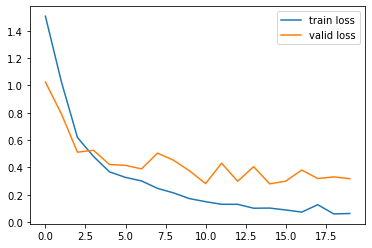

In [56]:
# Plot the train loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(valid_losses, label='valid loss')
plt.legend()
plt.show()

8. Test the network on the test data to find the accuracy of the model

In [57]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data
        
        # forward pass
        outputs = model(images)
        
        # get prediction
        # torch.max returns both max and argmax
        # dim = 0 max along columns
        # dim = 1 max along rows
        _, predicted = torch.max(outputs.data, dim=1)
        
         # update counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
                                                   100 * correct / total))

C:\Users\abylk\anaconda3\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the test images: 89 %


9. Get the all predictions of the testdata and store the result in an array called p_test

In [58]:
# get all predictions in an array p_test 
y_test = np.array(testset.targets)
p_test = np.array([])

model.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Forward pass
        outputs = model(images)

        # Get prediction
        # torch.max returns both max and argmax
        _, predictions = torch.max(outputs, 1)
  
        # update p_test
        p_test = np.concatenate((p_test, predictions.numpy()))

10. Plot the confusion matrix by seaborn

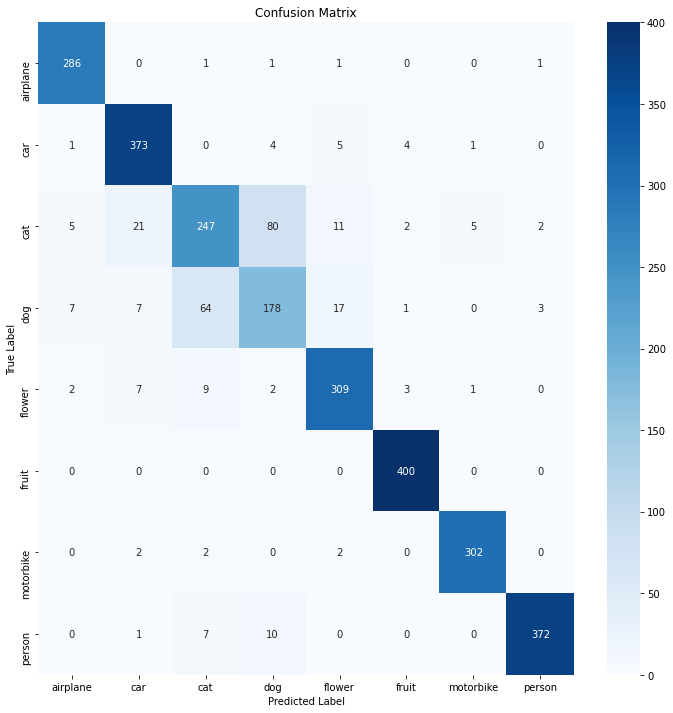

In [59]:
# plot confusion matrix        
cm = confusion_matrix(y_test, p_test)
#print(cm)
plt.figure(figsize=(12, 12))
plt.title("Confusion Matrix")
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
ax.set(ylabel="True Label", xlabel="Predicted Label")
ax.set_xticklabels(testset.classes)
ax.set_yticklabels(testset.classes)
plt.show()

11. Show some misclassified examples with true labels and predicted result

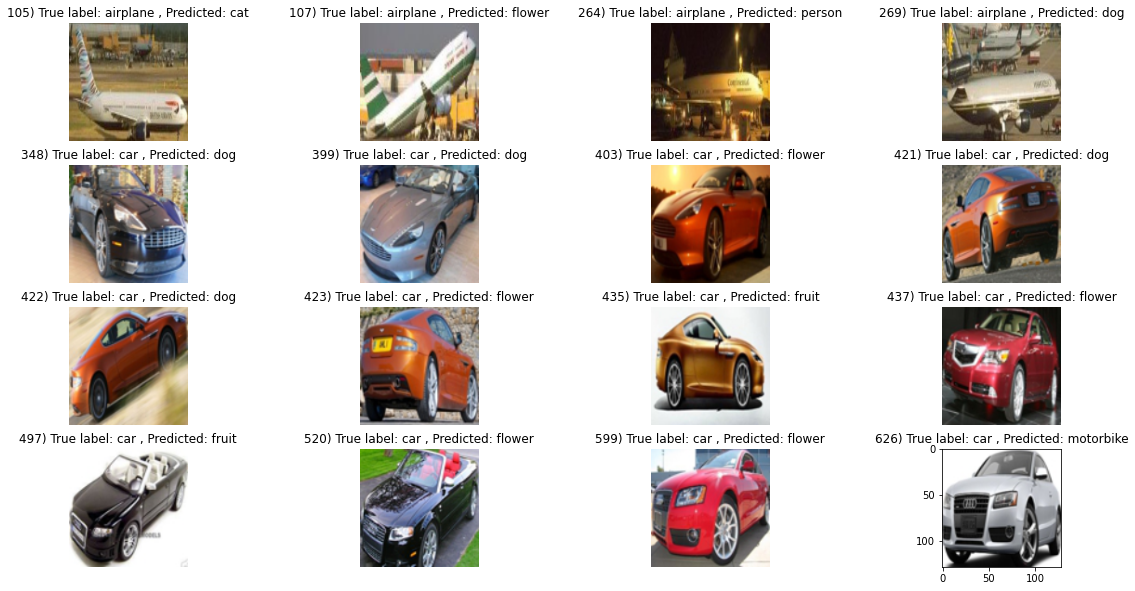

In [60]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8) # convert to unsigned integer type
x_test = testset.imgs
y_test = np.array(testset.targets)

plt.figure(figsize=(20,10))
j=1 
misclassified = np.where(p_test != y_test)[0][:16]
for i in misclassified:
    img = transforms(testset.loader(x_test[i][0]))/2+0.5
    plt.axis('off')
    plt.subplot(4,4,j)
    plt.title("%d) True label: %s , Predicted: %s" % (i, testset.classes[y_test[i]], testset.classes[p_test[i]]))
    plt.imshow(img.permute(1,2,0))   
    j+=1

12. Save the model as `lab2-1.pth` in the current directory

In [62]:
# save the model
PATH='./FashionMNIST-1.pth'
torch.save(model.state_dict(), PATH)

### Optional Exercise
Build your own CNN. Then apply the skills you have learnt (regularization methods, hyperparameter tunning, etc)  to tune the network. Find the accuracy of the model and plot the confusion matrix. 